## Observations and Insights 

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [198]:
# Combine the data into a single dataset
merged_docs_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_docs_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [199]:
# Checking the number of mice.
merged_docs_df.shape

(1893, 8)

In [200]:
merged_docs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [201]:
mouse_count = len(merged_docs_df["Mouse ID"].unique())
mouse_count


249

In [202]:
merged_docs_df.describe(include="object")

,Mouse ID,Drug Regimen,Sex
count,1893,1893,1893
unique,249,10,2
top,g989,Capomulin,Male
freq,13,230,958


In [203]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#try .loc
merged_docs_df[merged_docs_df.duplicated(["Mouse ID", "Timepoint"])].shape[0]


5

In [204]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_docs_df[merged_docs_df.duplicated()].head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [205]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_docs_df.drop_duplicates()

In [206]:
# Checking the number of mice in the clean DataFrame.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [207]:
clean_mouse_count = len(clean_df["Mouse ID"].unique())
clean_mouse_count

249

## Summary Statistics

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#list of regimen
drug_list = (clean_df["Drug Regimen"].unique())
print (drug_list)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [221]:
drg_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drg_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drg_variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drg_standard_deviation = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drg_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [233]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table_mean_df = pd.DataFrame(drg_mean)
stats_table = table_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

stats_table.assign(Median=drg_median,Variance=drg_variance,Standard_deviation=drg_standard_deviation,SEM=drg_sem)

,Mean,Median,Variance,Standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [232]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

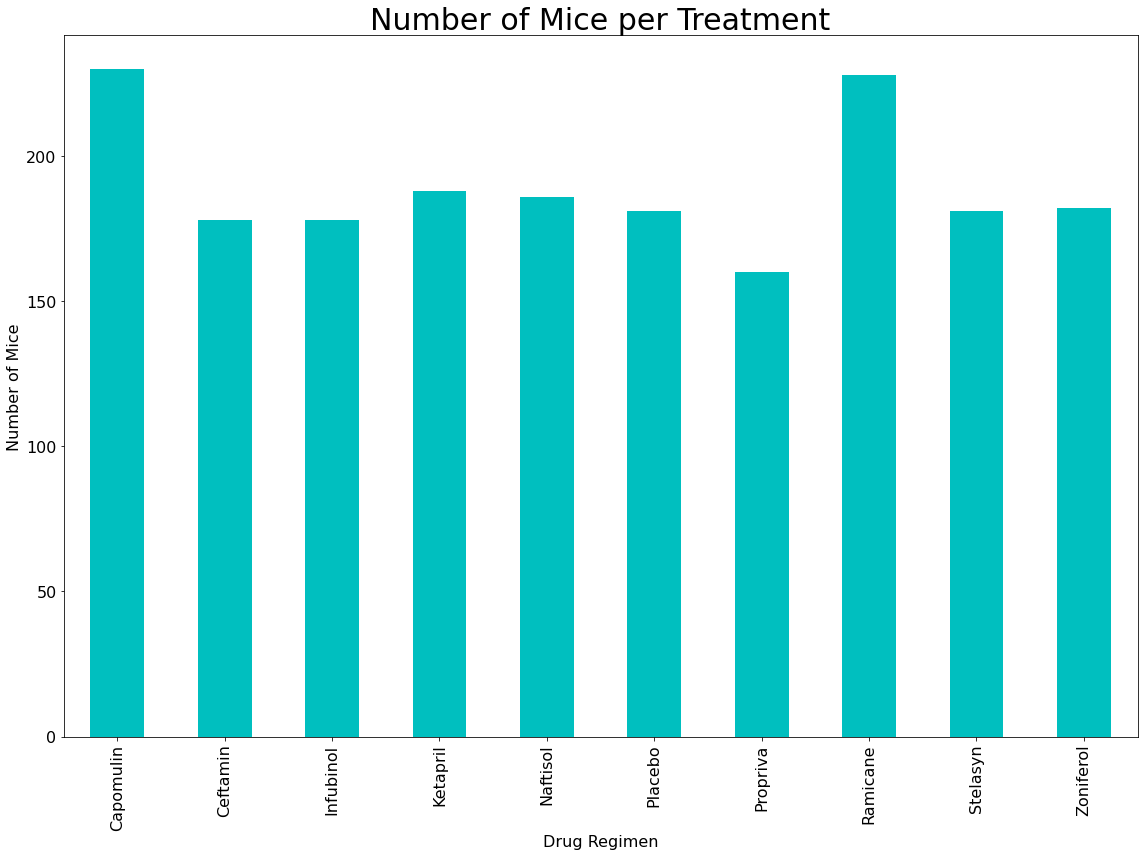

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [247]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


plot_pandas = mouse_per_drug.plot.bar(figsize=(16,12), color='c',fontsize = 16)
mouse_per_drug
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)
plt.title("Number of Mice per Treatment",fontsize = 30)

plt.savefig("../Images/mouse_per_drug.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

mouse_per_drug


In [249]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice_list =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 160, 228, 181, 182]

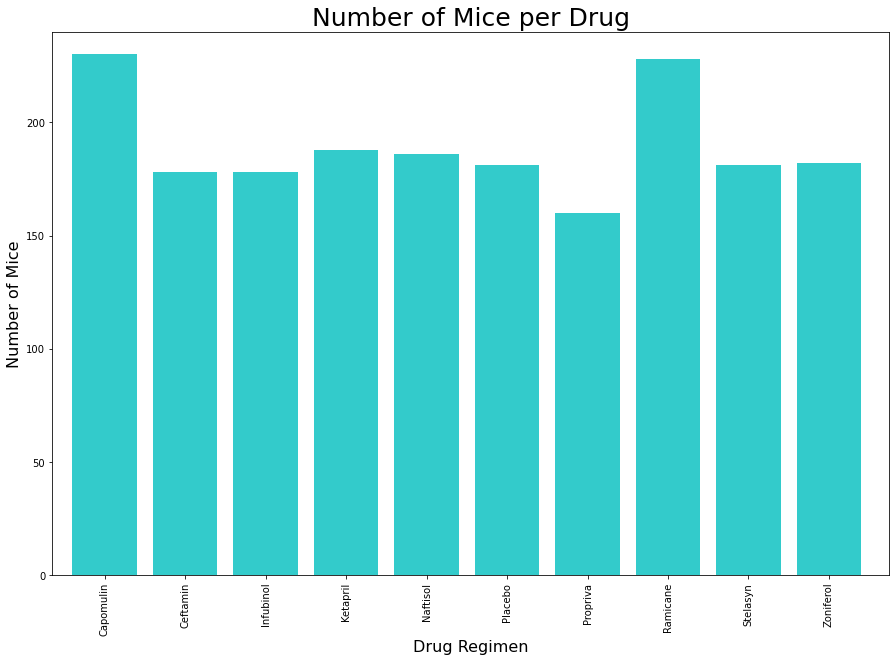

In [254]:
x_axis = np.arange(len(mouse_per_drug))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='c', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.65, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Drug",fontsize = 25)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)

plt.savefig("../Images/bar_mouse_per_drug.png", bbox_inches = "tight")

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data_df.groupby(["Mouse ID","Sex"])
gender_group
gender_df = pd.DataFrame(gender_group.size())


In [258]:
gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Counts"]

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
